In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from ase.io import read,write

In [2]:
def get_bands(fname="wannier_data/band_energies.pickle"):
    return pickle.load(open(fname,'rb'))


In [3]:
data=get_bands()
e=data['energies']#-data['reference']

21


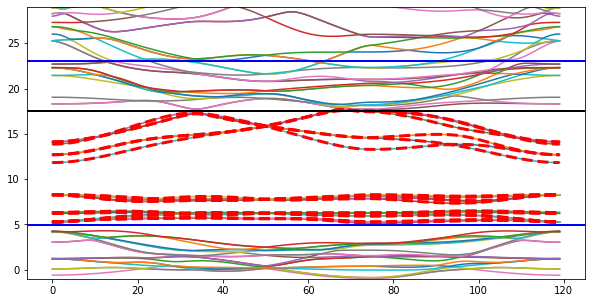

In [173]:
fig,ax=plt.subplots(figsize=(10,5))
for i in e[0].T:
    plt.plot(i)
    
nbnd=np.arange(39,51)
nbnd=np.arange(24,45)
print(len(nbnd))
for i in e[0].T[nbnd]:
    plt.plot(i,ls="--",c="r",lw=3)
n=24
# for j in [e[0].T[i] for i in range()]:
#     plt.plot(j,c="r",lw=5,ls=":")


plt.axhline(4.9,c="k",lw=2)
plt.axhline(17.5,c="k",lw=2)

plt.axhline(4.9,c="b",lw=2)
plt.axhline(23,c="b",lw=2)


plt.ylim(-1,29)
plt.show()

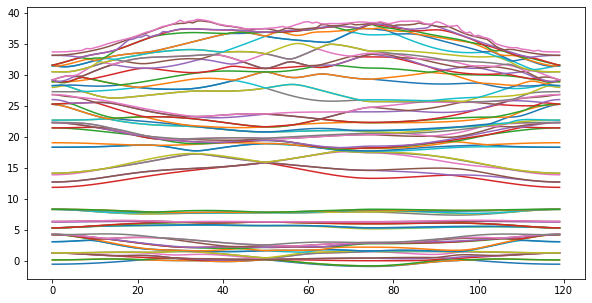

In [51]:
fig,ax=plt.subplots(figsize=(10,5))
for i in e[0].T[6:]:
    plt.plot(i)

In [50]:
orb=[[0, 1, 2, 3], [0, 1, 2, 3],
                                           [0, 1, 2, 3], [0, 1, 2, 3, 4],
                                           [0, 1, 2, 3, 4], [0, 1, 2, 3, 4],
                                           [0, 1, 2], [0, 1, 2], [0, 1, 2],
                                           [0, 1, 2], [0, 1, 2], [0, 1, 2]]
a=[]
for i in orb:a.extend(i)
len(a)

45

In [4]:
from pythtb import * # import TB model class
import matplotlib.pyplot as plt


In [8]:
silicon=w90(r"wannier_data/big/",r"licoo2")
my_model=silicon.model(max_distance=6,ignorable_imaginary_part=1e-1)
print("done")
evals=my_model.solve_all(data['path'].kpts)
print("done")

done
done


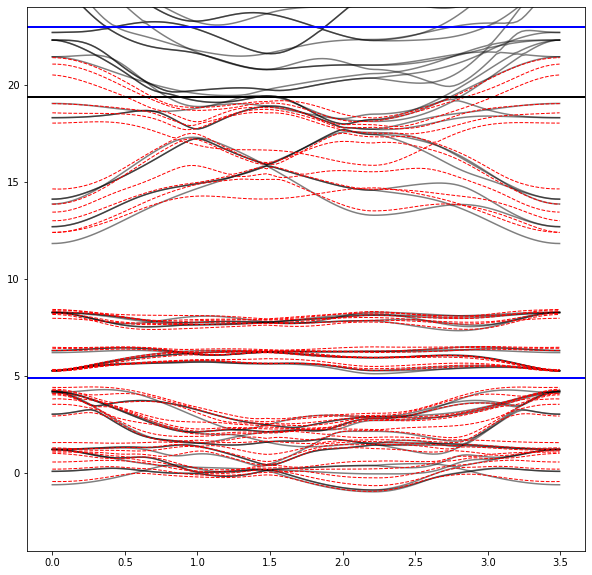

In [9]:
x=data['path'].get_linear_kpoint_axis()[0]
fig,ax=plt.subplots(figsize=(10,10))
for i in e[0].T:
    plt.plot(x,i,c="k",alpha=0.5)
for i in range(evals.shape[0]):
    plt.plot(x,evals[i],c="r",lw=1,ls="--")

plt.ylim(-4,24)
plt.axhline(4.9,c="k",lw=2)
plt.axhline(19.4,c="k",lw=2)

plt.axhline(4.9,c="b",lw=2)
plt.axhline(23,c="b",lw=2)

plt.show()

In [13]:
model=my_model.cut_piece(2,2)

In [14]:
path=[[0.,0.],[2./3.,1./3.],[.5,.5],[0.,0.]]
(k_vec,k_dist,k_node)=model.k_path(path,50,report=0)
evals=model.solve_all(k_vec)

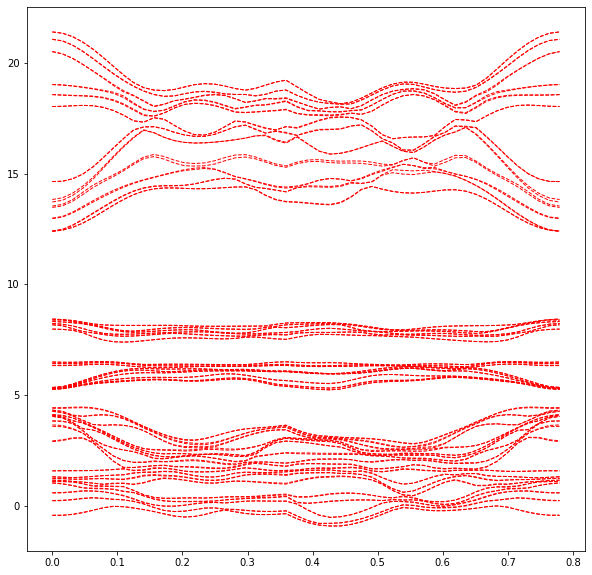

In [15]:
fig,ax=plt.subplots(figsize=(10,10))
for i in range(evals.shape[0]):
    plt.plot(k_dist,evals[i],c="r",lw=1,ls="--")
# plt.ylim(5,20)

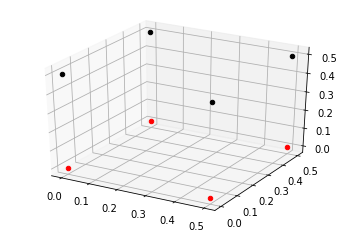

In [17]:
kpts,par=pickle.load(open("wannier_data/all_cobands.pickle",'rb'))
kpts,par=pickle.load(open("wannier_data/valence_bands.pickle",'rb'))
kpts,par=pickle.load(open("wannier_data/valc0_full.pickle",'rb'))
kpts,par,par_bnd=pickle.load(open("parity_vals.pickle",'rb'))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i,j in zip(kpts,par):
    if j==1:
        ax.scatter(i[0],i[1],i[2],c="k")
    else:
        ax.scatter(i[0],i[1],i[2],c="r")
plt.show()

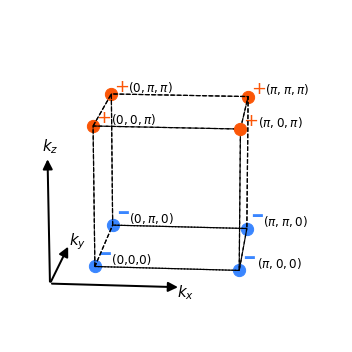

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import proj3d
def plot_cube(cube_definition):
    cube_definition_array = [
        np.array(list(item))
        for item in cube_definition
    ]
    class Arrow3D(mpatches.FancyArrowPatch):
        def __init__(self, xs, ys, zs, *args, **kwargs):
            mpatches.FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
            self._verts3d = xs, ys, zs

        def draw(self, renderer):
            xs3d, ys3d, zs3d = self._verts3d
            xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
            self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
            mpatches.FancyArrowPatch.draw(self, renderer)
    points = []
    points += cube_definition_array
    vectors = [
        cube_definition_array[1] - cube_definition_array[0],
        cube_definition_array[2] - cube_definition_array[0],
        cube_definition_array[3] - cube_definition_array[0]
    ]

    points += [cube_definition_array[0] + vectors[0] + vectors[1]]
    points += [cube_definition_array[0] + vectors[0] + vectors[2]]
    points += [cube_definition_array[0] + vectors[1] + vectors[2]]
    points += [cube_definition_array[0] + vectors[0] + vectors[1] + vectors[2]]

    points = np.array(points)

    edges = [
        [points[0], points[3], points[5], points[1]],
        [points[1], points[5], points[7], points[4]],
        [points[4], points[2], points[6], points[7]],
        [points[2], points[6], points[3], points[0]],
        [points[0], points[2], points[4], points[1]],
        [points[3], points[6], points[7], points[5]]
    ]

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection='3d')

    faces = Poly3DCollection(edges, linewidths=1.2,ls="--", edgecolors='k',zorder=-5)
    faces.set_facecolor((0,0,1,0.00))

    ax.add_collection3d(faces)

    for n in [3,5,6,7]:
        ax.scatter(points[:,0][n], points[:,1][n], points[:,2][n], s=150,c="#fb5607",zorder=6)
        d=0.01
        ax.text(points[:,0][n]+d, points[:,1][n]+d, points[:,2][n]+d,"+",c="#fb5607",fontsize=18)
    for n in [0,1,2,4]:
        ax.scatter(points[:,0][n], points[:,1][n], points[:,2][n], s=150,c="#3a86ff",zorder=6)
        d=0.01
        ax.text(points[:,0][n]+d, points[:,1][n]+d, points[:,2][n]+d,"-",c="#3a86ff",fontsize=38)
    lab=["(0,0,0)","$(0,\pi,0)$","$(\pi,0,0)$","$(0,0,\pi)$","$(\pi,\pi,0)$","$(0,\pi,\pi)$","$(\pi,0,\pi)$","$(\pi,\pi,\pi)$"]
    for n,text in zip([0,1,2,3,4,5,6,7],lab):
        ax.text(points[:,0][n]+d+0.05, points[:,1][n]+d, points[:,2][n]+d,text,c="k",fontsize=12)
    d=-0.05;d1=0.4;d3=0.1
    a = Arrow3D([d-d3,d-d3],[d,d],[d,d1], mutation_scale=20, lw=2, arrowstyle="-|>", color="k")
    b = Arrow3D([d-d3,d-d3],[d,d1],[d,d], mutation_scale=20, lw=2, arrowstyle="-|>", color="k")
    c = Arrow3D([d-d3,d1-d3],[d,d],[d,d], mutation_scale=20, lw=2, arrowstyle="-|>", color="k")
    ax.text(d-d3,d-d3,d1+0.05,"$k_z$",fontsize=15)
    ax.text(d-d3,d1,d,"$k_y$",fontsize=15)
    ax.text(d1-d3,d-d3,d,"$k_x$",fontsize=15)
    ax.add_artist(a)
    ax.add_artist(b)
    ax.add_artist(c)
    ax.set_xlim(-.05,0.6)
    ax.set_ylim(-.05,0.6)
    ax.set_zlim(-.05,0.6)
    ax.set_axis_off()
    ax.view_init(15, -85)
    plt.tight_layout()
    plt.savefig("Parity.png",dpi=400)
    plt.show()
cube_definition = [
    (0,0,0), (0,0.5,0), (0.5,0,0), (0,0,0.5)
]
plot_cube(cube_definition)

In [110]:
t1=t3=0
t2=t4=1
d=1
kz=0
H=lambda kz: np.array([
    [d,0,t1,t4*np.exp(1j*kz)],
    [0,-d,t2,t3],
    [t1,t2,d,0],
    [t4*np.exp(-1j*kz),t3,0,-d]
])
O=1/np.sqrt(4) * np.array([
    [0,0,1,0],
    [0,0,0,1],
    [1,0,0,0],
    [0,1,0,0]
])
np.linalg.norm(O)

1.0

In [112]:
kz=np.pi
kz=0
[np.sign(i) for i in np.sort(np.linalg.eigvals(O@H(kz)@O.T))]

[(-1+0j), (-1+0j), (1+0j), (1+0j)]

In [101]:
np.sort(np.linalg.eigvals(O@H(np.pi)@O.T))

array([-0.45069391+9.63635304e-34j, -0.2795085 -2.00259418e-33j,
        0.2795085 +1.25896827e-33j,  0.45069391+1.32073457e-33j])

In [118]:
np.linalg.eig(O@H(kz)@O.T)

(array([ 0.35355339+0.j, -0.35355339+0.j,  0.35355339+0.j, -0.35355339+0.j]),
 array([[ 0.92387953+0.j, -0.38268343+0.j, -0.        +0.j,
         -0.        +0.j],
        [-0.        +0.j, -0.        +0.j,  0.38268343-0.j,
          0.92387953+0.j],
        [-0.        +0.j, -0.        +0.j,  0.92387953+0.j,
         -0.38268343+0.j],
        [ 0.38268343-0.j,  0.92387953+0.j, -0.        +0.j,
         -0.        +0.j]]))

In [146]:
kz=np.pi
eigenValues, eigenVectors = np.linalg.eig(O@H(kz)@O.T)

idx = eigenValues.argsort()[::-1]   
eval = np.real(eigenValues[idx])
evecs = eigenVectors[:,idx]
for i in evec[0:2]:
    print(i+i@O)

[ 0.92387953+0.j -0.38268343+0.j  0.46193977+0.j -0.19134172+0.j]
[0.19134172+0.j 0.46193977+0.j 0.38268343+0.j 0.92387953+0.j]


In [147]:
i@O

array([0.19134172+0.j, 0.46193977+0.j, 0.        +0.j, 0.        +0.j])

In [7]:
kpts,par,par_bnd=pickle.load(open("parity_vals.pickle",'rb'))

In [73]:
lab=["("+str(i).replace("]","").replace("[","").replace("0.5","$\pi$")+")" for i in kpts]

In [79]:
val=[]
for i,j,l in zip(lab,par_bnd,par):
    tmp=[]
    tmp.append(i)
    tmp.extend(["+" if k==+1 else "-" for k in j])
    if l==1:
        ap=r"\textbf{+}"
    else:
        ap=r"\textbf{-}"
    tmp.append(ap)
    val.append(tmp)
    

In [80]:
from tabulate import tabulate
header=["kpoint/Band index"]
header.extend([str(i) for i in np.arange(1,len(par_bnd[0])+1)])
header.extend("Prod")
print(tabulate(val, header, tablefmt="latex_raw"))

\begin{tabular}{lllllllllllllllllllllllllllllllllll}
\hline
 kpoint/Band index     & 1   & 2   & 3   & 4   & 5   & 6   & 7   & 8   & 9   & 10   & 11   & 12   & 13   & 14   & 15   & 16   & 17   & 18   & 19   & 20   & 21   & 22   & 23   & 24   & 25   & 26   & 27   & 28   & 29   & 30   & 31   & 32   & 33   & P          \\
\hline
 (0, 0, 0)             & +   & -   & +   & +   & -   & -   & +   & +   & -   & +    & +    & -    & +    & -    & +    & -    & +    & -    & +    & -    & +    & -    & -    & -    & +    & +    & -    & +    & +    & -    & +    & +    & -    & \textbf{-} \\
 (0, 0, $\pi$)         & +   & -   & -   & +   & -   & +   & -   & +   & -   & -    & +    & -    & +    & -    & -    & +    & +    & -    & +    & +    & -    & +    & -    & +    & -    & +    & -    & -    & +    & -    & -    & +    & -    & \textbf{+} \\
 (0, $\pi$, 0)         & -   & -   & +   & +   & -   & +   & +   & -   & +   & -    & +    & -    & -    & +    & +    & -    & +    & +    & -    & -

In [212]:
a=np.loadtxt("wannier_data/big/licoo2_band.dat")

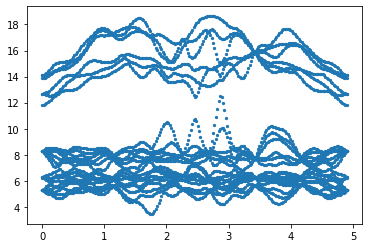

In [213]:
plt.scatter(a.T[0],a.T[1],s=5)